In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import f1_score

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# reading in the normalized dataset 
data = pd.read_csv('normal_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,status,pay_method_ACH,pay_method_credit card,pay_method_paper check,state_0,state_1,state_2,state_3,...,state,status_0,status_1,status_2,status_3,status_4,lp_amount,income,prod,Y
0,0,2014.0,Returned < 90 days,0,1,0,0,0,0,0,...,MA,0,0,0,0,1,0.500,0.654935,0.0,0
1,1,2015.0,Returned < 90 days,0,1,0,0,0,0,0,...,MA,0,0,0,0,1,0.375,0.654935,0.0,0
2,2,2016.0,Switched to LW,0,1,0,0,0,0,0,...,MA,0,0,0,1,0,0.375,0.654935,0.0,0
3,3,2016.0,Returned < 90 days,0,1,0,0,0,0,0,...,MA,0,0,0,0,1,0.625,0.654935,0.0,0
4,4,2014.0,Decline,0,1,0,0,0,0,0,...,MA,0,0,0,1,1,0.500,0.480234,0.0,0


In [3]:
# Up and Down sampling the positive and negative class in the dataset to balance out the dataset

# Splitting the dataset into majority and minority classes
data_majority = data[data.Y == 0]
data_minority = data[data.Y == 1]

# Counting the number of rows in each dataframe
print(data_majority['Y'].count())
print(data_minority['Y'].count())

94857
11386


In [4]:
# Up and Down sampling the positive and negative class in the dataset to balance out the dataset

# Using sklearn's resample function to balance out the dataset into equal value counts
data_majority_udownsampled = resample(data_majority, replace=True, n_samples=53122, random_state=2019)
data_minority_upsampled = resample(data_minority, replace=True, n_samples=53122, random_state=2019)

# Printing the two classes to make sure they are balanced out
print(data_majority_udownsampled['Y'].count())
print(data_minority_upsampled['Y'].count())

#Concatenating the two classes back into one dataframe
data_balanced = pd.concat([data_majority_udownsampled, data_minority_upsampled])

53122
53122


In [5]:
# Dropping the categorical columns in the unbalanced dataset
data = data.drop(['Unnamed: 0', 'state', 'months', 'status'], axis = 1)

# Creating a separate dataframe for the dropped columns that can't be used in a logistic regression
data_dropped = data_balanced[['state', 'months', 'status']]

# Dropping rows that will not be used in the logistic regression
data_balanced = data_balanced.drop(['Unnamed: 0', 'state', 'months', 'status'], axis = 1)

In [6]:
# Splitting the dataset into the features and target variables
X = data.iloc[:,:-1]
y = data['Y']

# Splitting the data using the train_test_split sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [7]:
# Splitting the dataset into the features and target variables
X2 = data_balanced.iloc[:,:-1]
y2 = data_balanced['Y']

# Splitting the data using the train_test_split sklearn package
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=2019)

In [8]:
# Starting to build the parameters of the model
logreg = LogisticRegression(solver='liblinear')

# Fitting the model using the training data
logreg = logreg.fit(X_train, y_train)

# Creating the y_pred variable
y_pred = logreg.predict(X_test)

# Creating the confusion matrix variable
cnf_mat = metrics.confusion_matrix(y_test, y_pred)
cnf_mat

array([[23530,   133],
       [ 2555,   343]])

In [9]:
# Starting to build the parameters of the model
logreg = LogisticRegression(solver='liblinear')

# Fitting the model using the training data
logreg = logreg.fit(X2_train, y2_train)

# Creating the y2_pred variable
y2_pred = logreg.predict(X2_test)

# Creating the confusion matrix for the regression
cnf_mat2 = metrics.confusion_matrix(y2_test, y2_pred)
cnf_mat2

array([[ 8551,  4647],
       [  459, 12904]])

Text(0.5, 257.44, 'Predicted')

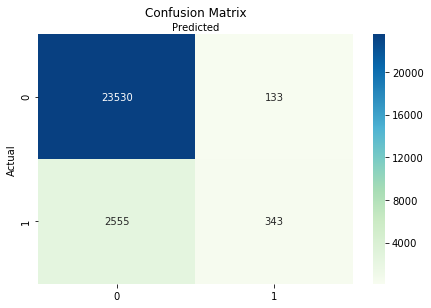

In [10]:
# Visualizing the confusion matrix of the imbalanced dataset to make it easier to view
names = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(names))
plt.xticks(ticks, names)
plt.yticks(ticks, names)

sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 257.44, 'Predicted')

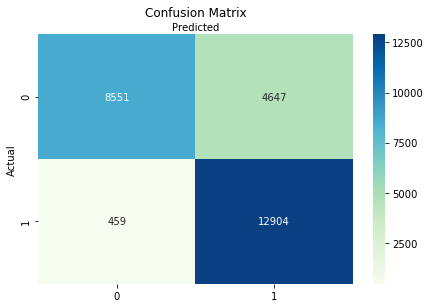

In [11]:
# Visualizing the confusion matrix of the balanced dataset to make it easier to view
names = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(names))
plt.xticks(ticks, names)
plt.yticks(ticks, names)

sns.heatmap(pd.DataFrame(cnf_mat2), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [12]:
# Printing the accuracy, precision, and recall for the imbalanced dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8987989910018448
Precision: 0.7205882352941176
Recall: 0.11835748792270531


In [13]:
# Printing the accuracy, precision, and recall for the balanced dataset
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.8077632619253793
Precision: 0.7352287618939092
Recall: 0.9656514255780888


In [14]:
# Getting the f1 score for the imbalanced dataset
f1_score(y_test, y_pred, average='weighted')

0.8649393117749096

In [15]:
# Getting the f1 score for the balanced dataset
f1_score(y2_test, y2_pred, average='weighted')

0.8026585989095655

In [16]:
# Concatenating the data back together with the columns I dropped earlier in the notebook
data_balanced = pd.concat([data_balanced, data_dropped] ,axis = 1)

#Changing the dataframe order so the Y variable is last
data_balanced = data_balanced[['year', 'pay_method_ACH', 'pay_method_credit card',
       'pay_method_paper check', 'state_0', 'state_1', 'state_2', 'state_3',
       'state_4', 'state_5', 'state_6', 'status_0', 'status_1', 'status_2',
       'status_3', 'status_4', 'lp_amount', 'income', 'prod', 'state',
       'months', 'status', 'Y']]

data_balanced.columns

Index(['year', 'pay_method_ACH', 'pay_method_credit card',
       'pay_method_paper check', 'state_0', 'state_1', 'state_2', 'state_3',
       'state_4', 'state_5', 'state_6', 'status_0', 'status_1', 'status_2',
       'status_3', 'status_4', 'lp_amount', 'income', 'prod', 'state',
       'months', 'status', 'Y'],
      dtype='object')

In [17]:
# Exporting the balanced data to a csv file to be used in the other classification models
data_balanced.to_csv('final_data.csv',',')